In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx

from network import Network
from data import get_MNIST_data_loaders
from train import train_network
from evaluate import accuracy
from utils import reshape_image

from community import community_louvain

In [2]:
def load_network(fname):
    state = torch.load(fname)
    model = Network(
        1 if state["variant"] == "p" else 28, 
        state["hidden_dim"], 
        10, 
        neuron_type=state["neuron_type"], 
        freeze_neurons=state["freeze_neurons"], 
        freeze_g=state["freeze_activations"]
    )
    model.load_state_dict(state["model_state_dict"])
    print(state)
    return model

'''
def load_network(fname):
    state = torch.load(fname)
    model = Network(
        28, 
        128, 
        10, 
        neuron_type="ekfr", 
        freeze_neurons=False, 
        freeze_g=True
    )
    model.load_state_dict(state)
    return model'''

'\ndef load_network(fname):\n    state = torch.load(fname)\n    model = Network(\n        28, \n        128, \n        10, \n        neuron_type="ekfr", \n        freeze_neurons=False, \n        freeze_g=True\n    )\n    model.load_state_dict(state)\n    return model'

In [3]:
variant = "l"
train_loader, test_loader = get_MNIST_data_loaders(256, variant=variant)

In [4]:
model = load_network("model/network_params/l_ekfr_128_True_True.pt")

{'model_state_dict': OrderedDict([('fc1.weight', tensor([[-3.6660e+01, -5.4620e+01, -1.6922e+01,  ..., -1.1194e+01,
         -9.7303e+00,  9.4315e+00],
        [ 5.0934e+00, -1.7373e+01, -2.7320e-02,  ..., -2.4118e-01,
          6.9478e-01, -3.8815e+00],
        [-7.4332e+00, -1.2311e+01, -1.6540e+01,  ...,  3.8554e+00,
         -1.3465e+01,  1.9542e+00],
        ...,
        [-3.9189e-01, -9.2537e+00, -5.5809e+00,  ..., -4.9873e-01,
          1.2437e+01, -9.3697e+00],
        [-5.7357e+00, -6.5087e-01,  1.1169e+00,  ...,  6.5917e-02,
         -1.9150e-01, -4.9340e-01],
        [ 8.6335e+00,  5.6087e+00, -1.3509e+01,  ...,  1.0661e+01,
          2.2039e+00,  3.3389e+00]])), ('fc1.bias', tensor([ 0.2610,  0.5429,  0.4486,  0.5077,  0.6702,  0.8475,  0.6435,  0.5988,
         0.2566,  1.4966,  0.3398,  0.7171,  0.8868,  0.6775,  0.7376,  0.6100,
         0.4589,  0.3692,  0.5040,  0.5883,  1.1399,  0.2950, -6.6697,  0.6825,
         0.2842,  1.4073,  1.3386,  0.7503,  0.6931, -0.2580,  0

In [5]:
model.hidden_neurons.ds

Parameter containing:
tensor([0.0198, 0.1131, 0.4727, 0.9716, 1.0000])

In [5]:
with torch.no_grad():
    fs = []
    for x, label in test_loader:
        x = reshape_image(x, variant=variant)
        '''
        # sequentially send input into network
        model.reset(x.shape[0])
        for i in range(x.shape[1]):
            model(x[:, i, :])
            fs.append(model.hidden_neurons.fs)

        total_pred = torch.zeros(x.shape[0], 10)
        for _ in range(5):
            pred_y = model(model.zero_input(x.shape[0]))
            fs.append(model.hidden_neurons.fs)'''
        break

0


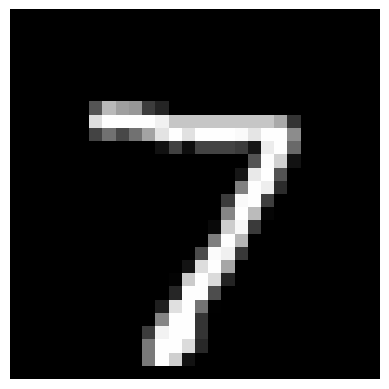

1


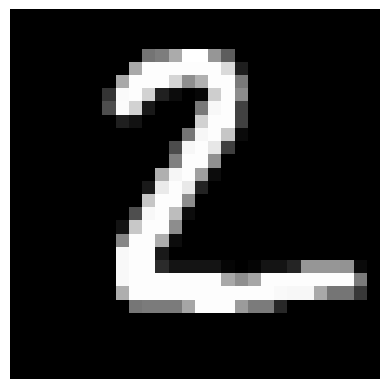

2


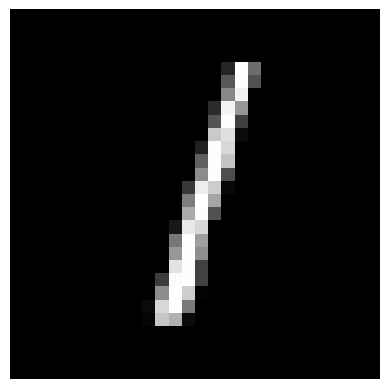

3


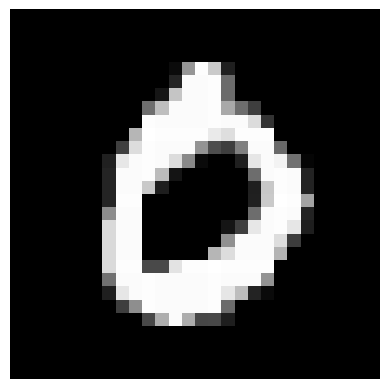

4


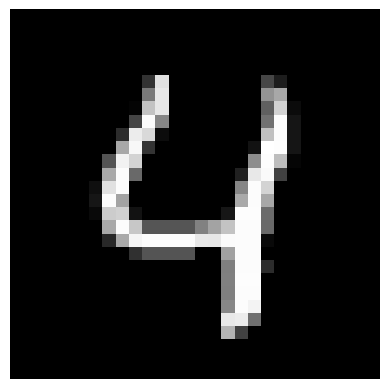

5


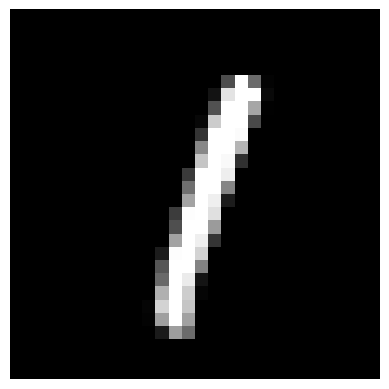

6


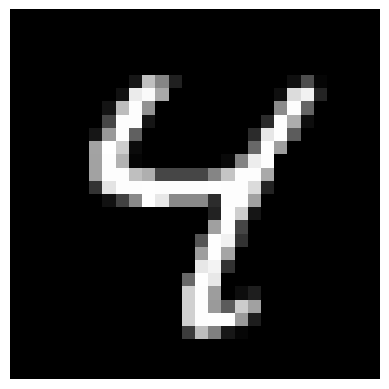

7


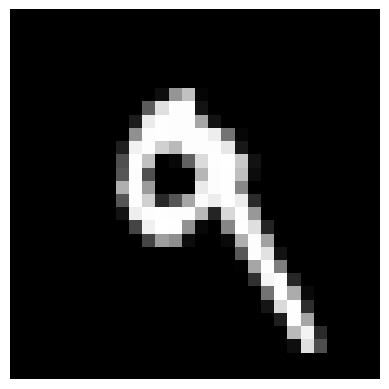

8


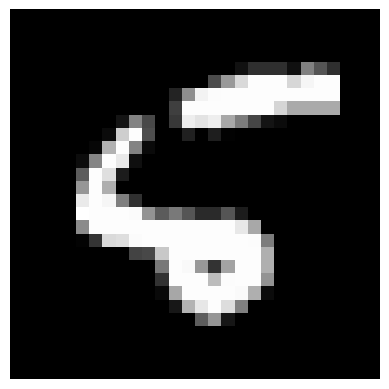

9


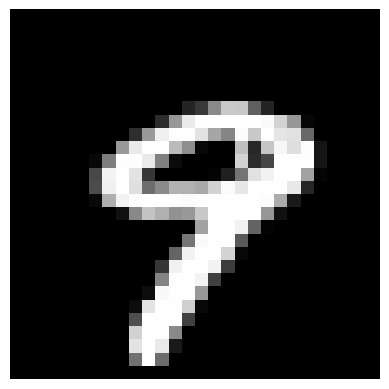

10


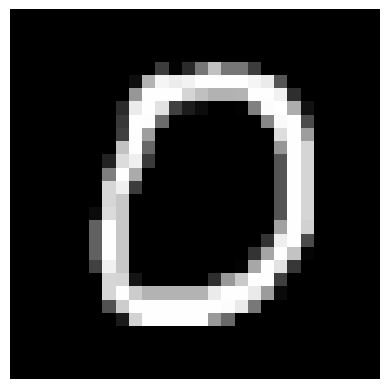

11


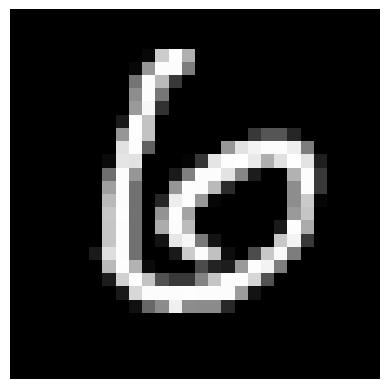

12


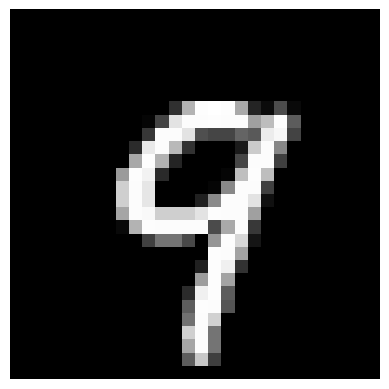

13


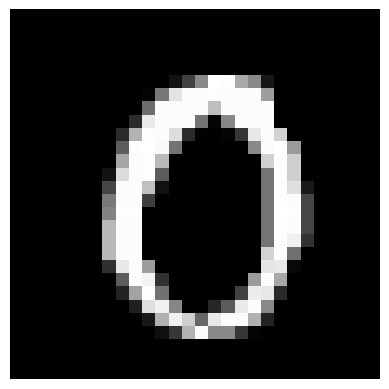

14


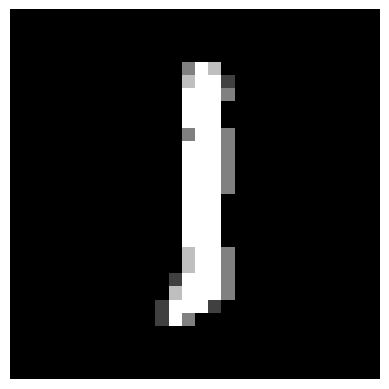

15


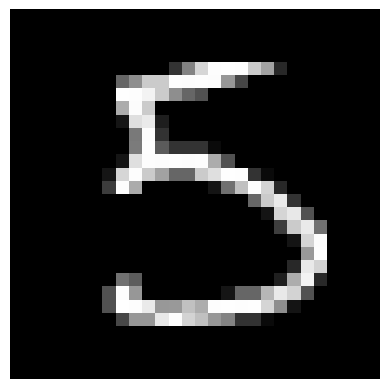

16


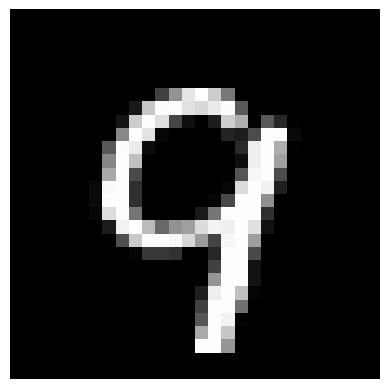

17


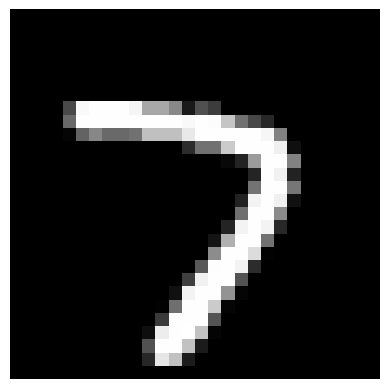

18


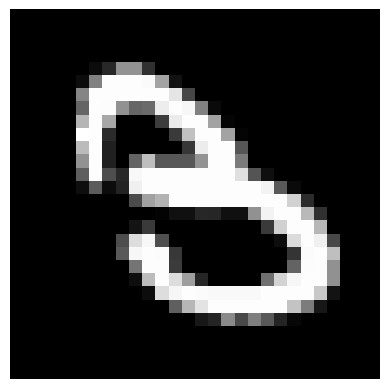

19


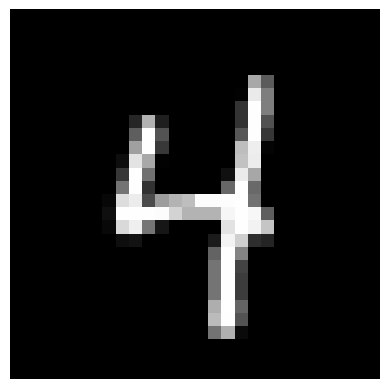

In [6]:
for i in range(20):
    print(i)
    plt.figure()
    plt.imshow(x.detach()[i, :, :], cmap="gray")
    plt.axis("off")
    plt.show()

In [7]:
i = 0

In [8]:
As = torch.stack([f[i,:] for f in fs])
with torch.no_grad():
    w = F.softmax(model.fc3(fs[-1][i,:]), dim=0)

RuntimeError: stack expects a non-empty TensorList

In [ ]:
plt.imshow(x.detach()[i, :, :], cmap="gray")
plt.axis("off")

/var/folders/1d/cmypn_251jlfyvc132scjqd40000gp/T/ipykernel_50276/784502518.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=1.0)


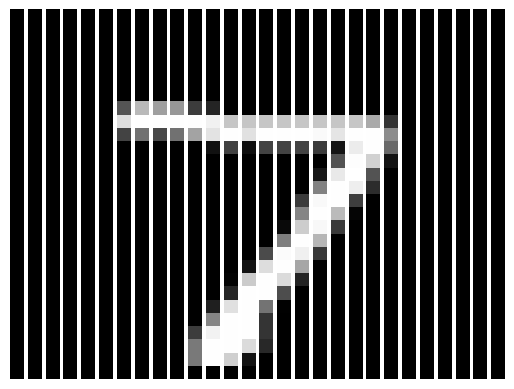

In [23]:
fig, axs = plt.subplots(1, 28)
fig.tight_layout(pad=1.0)
for j in range(28):
    axs[j].imshow(x.detach()[i, :, j].reshape(28, 1), cmap="gray", vmin=0, vmax=1)
    axs[j].axis("off")

In [10]:
x.shape

torch.Size([256, 576, 1])

/var/folders/1d/cmypn_251jlfyvc132scjqd40000gp/T/ipykernel_50276/3399382440.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=1.0)


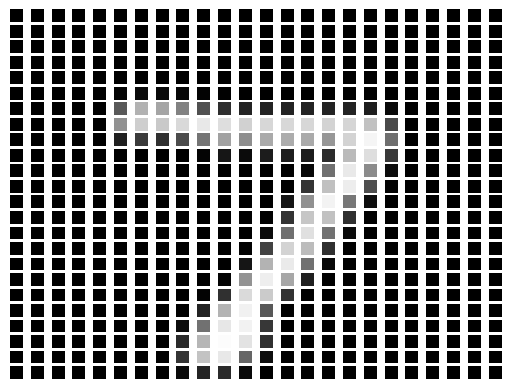

In [14]:
fig, axs = plt.subplots(24, 24)
fig.tight_layout(pad=1.0)
for j in range(24):
    for k in range(24):
        axs[j, k].imshow(x.detach()[i, :, :].reshape(24, 24)[j, k].reshape(1, 1), cmap="gray", vmin=0, vmax=1)
        axs[j, k].axis("off")

In [ ]:
A = model.fc2.weight.detach().abs().numpy()
G = nx.from_numpy_array(A)
partition = community_louvain.best_partition(G)

order = []
for v in np.unique(list(partition.values())):
    for k in partition:
        if partition[k] == v:
            order.append(k)

In [ ]:
plt.imshow(A[order, :][:, order])

In [ ]:
plt.figure(dpi=200)
plt.imshow(As.T[order, :])
#plt.imshow(As.T)
plt.xlabel("time")
plt.ylabel("neuron")

In [ ]:
plt.figure(dpi=200)
plt.imshow(w.reshape(-1, 1))
#plt.yticks(ticks=np.arange(0, 10), minor=True)
plt.yticks(np.arange(10), [str(i) for i in range(10)])
plt.xticks([]);